In [1]:
import pandas as pd

In [2]:
loan_data = pd.read_csv('loan3_data.csv')
loan_data.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22,female,Master,71948,0,RENT,35000,PERSONAL,16.02,0.49,3,561,No,1
1,21,female,High School,12282,0,OWN,1000,EDUCATION,11.14,0.08,2,504,Yes,0
2,25,female,High School,12438,3,MORTGAGE,5500,MEDICAL,12.87,0.44,3,635,No,1
3,23,female,Bachelor,79753,0,RENT,35000,MEDICAL,15.23,0.44,2,675,No,1
4,24,male,Master,66135,1,RENT,35000,MEDICAL,14.27,0.53,4,586,No,1


In [3]:
loan_data.shape

(45000, 14)

In [4]:
loan_data.isnull().sum()

person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64

In [5]:
loan_data.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


In [6]:
loan_data['loan_intent'].value_counts()

loan_intent
EDUCATION            9153
MEDICAL              8548
VENTURE              7819
PERSONAL             7552
DEBTCONSOLIDATION    7145
HOMEIMPROVEMENT      4783
Name: count, dtype: int64

In [7]:
loan_data['person_home_ownership'].value_counts()

person_home_ownership
RENT        23443
MORTGAGE    18489
OWN          2951
OTHER         117
Name: count, dtype: int64

In [8]:
#Encoding categorical columns
from sklearn.preprocessing import LabelEncoder

columns_to_encode = ['person_gender','person_education','person_home_ownership','loan_intent','previous_loan_defaults_on_file']
le=LabelEncoder()

for col in columns_to_encode:
    loan_data[col] = le.fit_transform(loan_data[col])
                                      
    

In [9]:
loan_data.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22,0,4,71948,0,3,35000,4,16.02,0.49,3,561,0,1
1,21,0,3,12282,0,2,1000,1,11.14,0.08,2,504,1,0
2,25,0,3,12438,3,0,5500,3,12.87,0.44,3,635,0,1
3,23,0,1,79753,0,3,35000,3,15.23,0.44,2,675,0,1
4,24,1,4,66135,1,3,35000,3,14.27,0.53,4,586,0,1


In [15]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report

In [16]:
x = loan_data.drop(['loan_status'],axis=1)
y=loan_data[['loan_status']]

In [17]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [19]:
rf_model = RandomForestClassifier(n_estimators=100,random_state = 42)
rf_model.fit(x_train,y_train)

C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(random_state=42)

In [20]:
y_pred = rf_model.predict(x_test)

In [21]:
y_pred

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [30]:
print("accuracy:",accuracy_score(y_test,y_pred))


accuracy: 0.9286666666666666


In [31]:
report = classification_report(y_test,y_pred)

print("\n"+report)


              precision    recall  f1-score   support

           0       0.94      0.97      0.95      6990
           1       0.89      0.78      0.83      2010

    accuracy                           0.93      9000
   macro avg       0.91      0.87      0.89      9000
weighted avg       0.93      0.93      0.93      9000



In [32]:
import matplotlib.pyplot as plt


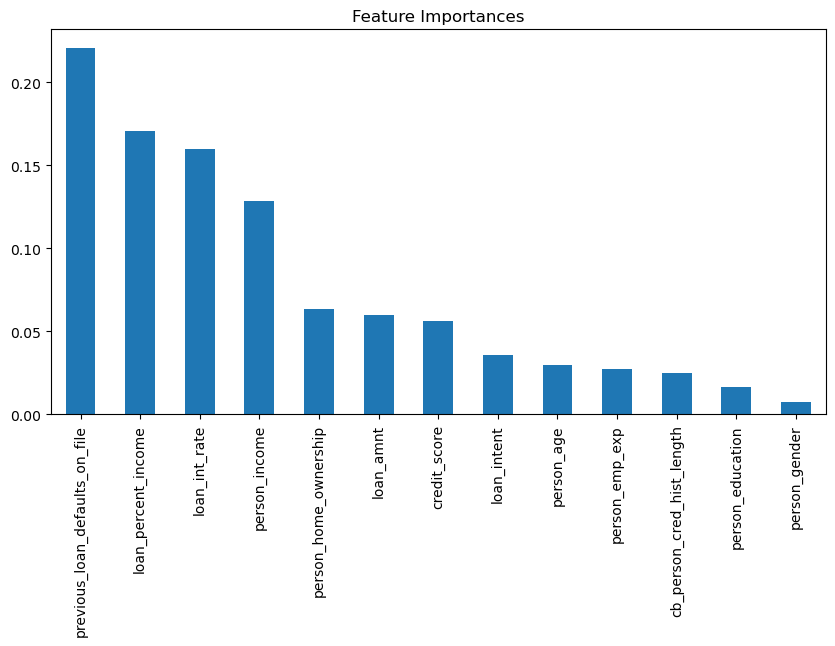

In [38]:
feature_importances = pd.Series(rf_model.feature_importances_,index=x.columns)
feature_importances.sort_values(ascending = False).plot(kind='bar',figsize=(10,5))
plt.title('Feature Importances')
plt.show()